In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from numpy.linalg import norm

In [5]:
def read_dat(fdat):
    df = {}
    with open(fdat, 'r') as fid:
        for row in fid.readlines():
            row = row.split()
            if row[0] == 'add':
                uid = int(row[1])
                x = int(row[2])
                y = int(row[3])
                z = int(row[4])
                df[uid] = {'p':[(x,y,z)], 'bind':False}
            elif row[0] == 'bind':
                df[uid]['bind'] = True
            elif row[0] == 'move':
                uid = int(row[1])
                x = int(row[2])
                y = int(row[3])
                z = int(row[4])
                df[uid]['p'].append((x,y,z))
    return df 

In [26]:
# it can take a long time
df = read_dat('dla.dat')

for uid in df:
    df[uid]['p'] = np.array(df[uid]['p'])

In [27]:
# number of binds
B = []
for uid in df:
    if df[uid]['bind']:
        B.append(uid)
print('B=',B)

B= [0]


In [28]:
# check dist between two consecutive positions
d = {}
for uid in df:
    P = df[uid]['p'] # launch position
    d[uid] = np.zeros(len(P)-1, dtype=int)
    for i in range(0, len(P) - 1):
        d[uid][i] = np.sum(np.abs(P[i+1] - P[i]))

In [32]:
for uid in df:
    for i in d[uid]:
        if i > 1:
            print(uid)
            break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [23]:
np.zeros(3, dtype=int)

array([0, 0, 0])

In [43]:
Dmin, Dmax = [], []
p0 = np.array(df[0]['p'][0])
for uid in df:
    dmin = np.inf    
    dmax = 0
    P = np.array(df[uid]['p'])
    for p in P:
        d = norm(p - p0)
        if d > dmax:
            dmax = d
        if d < dmin:
            dmin = d
    Dmin.append(dmin)
    Dmax.append(dmax)
D = {'uid':np.arange(len(Dmin)), 'dmin':Dmin, 'dmax':Dmax}

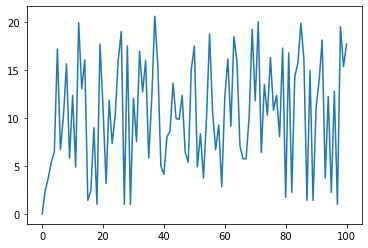

In [56]:
ax = sns.lineplot(x=D['uid'], y=D['dmin'])
#ax = sns.lineplot(x=D['uid'], y=D['dmax'])